In [18]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [20]:
df=pd.read_csv('emails.csv')

In [21]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [24]:
X = df.iloc[:,1:3001]
Y=df['Prediction']

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [30]:
X_train

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4686,3,6,1,3,0,1,38,1,0,7,...,0,0,0,0,0,0,0,0,1,0
4130,1,0,1,1,1,1,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2789,4,3,19,1,2,1,49,2,8,1,...,0,0,0,0,0,0,0,0,0,0
4315,2,3,1,2,1,0,27,0,0,8,...,0,0,0,0,0,0,0,0,0,0
326,0,0,1,0,1,3,14,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,3,2,0,2,0,16,0,0,1,...,0,0,0,0,0,0,0,0,0,0
466,4,5,1,0,5,1,28,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3092,0,0,1,0,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,2,11,1,6,4,5,58,10,0,12,...,0,0,0,0,0,0,0,0,3,0


In [32]:
svc = SVC(C=1.0,kernel='rbf')     

In [34]:
svc.fit(X_train,Y_train)

SVC()

In [35]:
y_pred=svc.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_pred,Y_test)

0.8120649651972158

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [39]:
from sklearn.neighbors import KNeighborsRegressor

score=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))

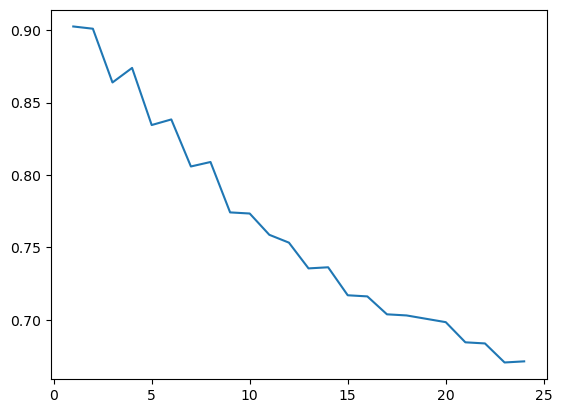

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1,25),score)